# **1. Carga de importaciones y Data set**

In [ ]:
#---- Importaciones necesarias ----

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #Entrenamiento y test

#---- Metricas de modelos de clasificación ----

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import precision_recall_curve, average_precision_score


#----  Curva ROC y PR ----

from sklearn.metrics import roc_auc_score,roc_curve,auc

#---- Importación para el modelo SVR ----

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#---- Para encontrar los mejores parametros ----

from sklearn.model_selection import RandomizedSearchCV, train_test_split




In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-2-3158976174.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


# **2.Preparcion de datos**

## Respaldo del dataframe

In [ ]:
# Crear una variable como respaldo para poder arreglar el data set para poder utilizar despues para modelar
df_backup = df.copy()

## Limpieza de datos

In [ ]:
df_backup.drop(columns=['Unnamed: 0'], inplace=True)
# esta colmuna se elimnara ya que solamente contiene datos false lo que indica que ningun jugador ha presentado fallas en las partidas
df_backup.drop(columns=['AbnormalMatch'], inplace=True)
#esta colmuna FirstKillTime la eliminaremos ya que nos sirve para la hipotesis o preguntas
df_backup.drop(columns=['FirstKillTime'], inplace=True)
#Eliminad tiemplive y TravelledDistance podria no ser relevante para el analisis o hipotesis
df_backup.drop(columns=['TimeAlive'], inplace=True)
df_backup.drop(columns=['TravelledDistance'], inplace=True)

In [ ]:
# Como hay pocos nulos, eliminamos esas filas
df_backup.dropna(inplace=True)
# Verificar cantidad de nulos
print(df_backup.isnull().sum())

Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int64


### Eliminación de datos atipicos

In [ ]:
# Eliminando datos atipicos mayores a 28 de la culumna Asesinatos en la partida
df_backup.drop(df_backup[df_backup['MatchKills'] > 28].index, inplace=True)
df_backup.shape

(78992, 25)

In [ ]:
# Eliminando datos atipicos mayores a 8 de la culumna asistencias en la partida
df_backup.drop(df_backup[df_backup['MatchAssists'] > 8].index, inplace=True)
df_backup.shape

(78707, 25)

# **Trasformacion de datos**



* **Ver Valores Únicos en la Columna ""Team" y "Mapa"**

In [ ]:
df_backup.Team.unique()

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Uso de la técnica - label encoding


In [ ]:
label_encoder = LabelEncoder()
df_backup['Team'] = label_encoder.fit_transform(df_backup['Team'])
df_backup['Map'] = label_encoder.fit_transform(df_backup['Map'])

In [ ]:
df_backup['Map'].unique()

array([1, 3, 2, 0])

## Transformación de los datos Booleanos

In [ ]:
df_backup.RoundWinner = df_backup.RoundWinner.astype(bool)
df_backup.MatchWinner = df_backup.MatchWinner.astype(bool)
# convertir numeros
df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.MatchWinner.replace({True: 1, False: 0}, inplace=True)
df_backup.Survived.replace({True: 1, False: 0}, inplace=True)

/tmp/ipython-input-11-2506564562.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)
/tmp/ipython-input-11-2506564562.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup.RoundWinner.replace({True: 1, False: 0}, inplace=True)


In [ ]:
# Revisar estructura y tipos
df_backup.info()
# Vista previa de los primeros datos limpios
df_backup.head()

<class 'pandas.core.frame.DataFrame'>
Index: 78707 entries, 0 to 79156
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          78707 non-null  int64  
 1   Team                         78707 non-null  int64  
 2   InternalTeamId               78707 non-null  int64  
 3   MatchId                      78707 non-null  int64  
 4   RoundId                      78707 non-null  int64  
 5   RoundWinner                  78707 non-null  int64  
 6   MatchWinner                  78707 non-null  int64  
 7   Survived                     78707 non-null  int64  
 8   RLethalGrenadesThrown        78707 non-null  int64  
 9   RNonLethalGrenadesThrown     78707 non-null  int64  
 10  PrimaryAssaultRifle          78707 non-null  float64
 11  PrimarySniperRifle           78707 non-null  float64
 12  PrimaryHeavy                 78707 non-null  float64
 13  PrimarySMG           

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,RLethalGrenadesThrown,RNonLethalGrenadesThrown,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,1,1,1,4,1,1,1,0,0,4,...,0,0,0,0,750,4400,0,0,0,0
1,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,800,4400,0,0,0,0
2,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,1000,4400,0,0,0,0
3,1,1,1,4,1,1,1,0,0,0,...,0,0,0,0,850,4400,0,0,0,0
4,1,1,1,4,1,1,1,1,1,1,...,0,0,0,0,1000,4400,0,0,0,0



- limitar las rondas que sean mayores 30 rondas

In [ ]:
#  ajustar rondas que sean mayor a 30
df_backup = df_backup[(df_backup['RoundId'] >= 1) & (df_backup['RoundId'] <= 30)]

df_backup['RoundId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])


- limitar las rondas que sean mayores 30 rondas

# **3. Modelo SVC - (Support Vector Classification)**

Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


###  Ingreso de las caracteristicas

In [ ]:
X = df_backup[['RoundStartingEquipmentValue', 'MatchKills','RoundHeadshots','RLethalGrenadesThrown']]
#X = df_backup[['RoundStartingEquipmentValue','TeamStartingEquipmentValue']] # Variables predictoras
#X = df_backup[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG' ,'PrimaryPistol']] # Variables predictoras
y = df_backup['MatchWinner']

### Separación de los datos: entrenamiento y prueba


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("Datos de entrenamiento: ",X_train.shape)
print("Datos de prueba: ",X_test.shape)

Datos de entrenamiento:  (55027, 4)
Datos de prueba:  (23583, 4)


### Escala de los datos

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

### Creación del modelo SVC y entrenamiento

In [ ]:
modelo_svc = SVC()

In [ ]:
# Entrenar el modelo
modelo_svc.fit(X_train_scaled, y_train)

SVC()

### Realizar predicciones


In [ ]:
y_pred_svc = modelo_svc.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


### Evaluación del modelo

In [ ]:
print(f"--- Metricas de Clasificación del modelo SVC ---\n")
print(classification_report(y_test, y_pred_svc))

print(f" -- Matriz de Confusión del modelo SVC ---\n")
print(confusion_matrix(y_test, y_pred_svc))
print("Precisión (Accuracy) del modelo SVC:", accuracy_score(y_test, y_pred_svc))
#VERIFICAR SI ESTAN TODAS LAS METRICAS

--- Metricas de Clasificación del modelo SVC ---

              precision    recall  f1-score   support

           0       0.53      1.00      0.69     12442
           1       0.25      0.00      0.00     11141

    accuracy                           0.53     23583
   macro avg       0.39      0.50      0.35     23583
weighted avg       0.40      0.53      0.36     23583

 -- Matriz de Confusión del modelo SVC ---

[[12439     3]
 [11140     1]]
Precisión (Accuracy) del modelo SVC: 0.5274986218886486


# **Calculando Sensitivity Y Specificity**

In [ ]:
TN, FP, FN, TP = cm_M.ravel()


sensitivity = TP / (TP + FN)


specificity = TN / (TN + FP)

print(f"\n--- Sensitivity and Specificity for SVC model ---\n")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


--- Sensitivity and Specificity for SVC model ---

Sensitivity: 0.0001
Specificity: 0.9998


### Grafico de la matriz de confusión

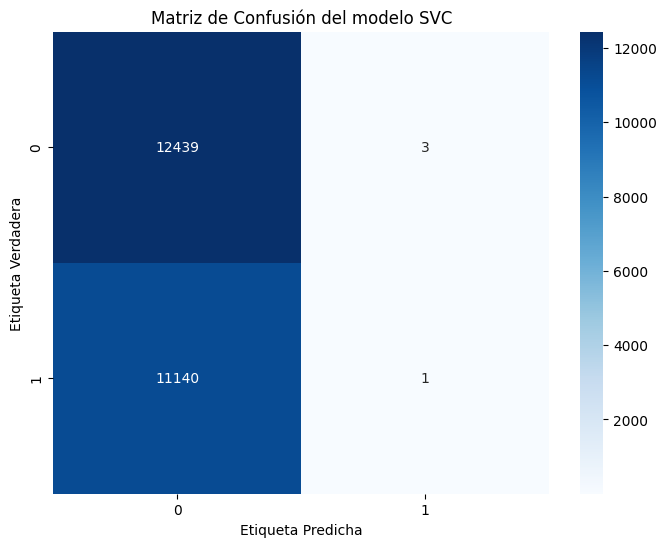

In [ ]:
cm_M = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_M, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del modelo SVC')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

### Curva ROC

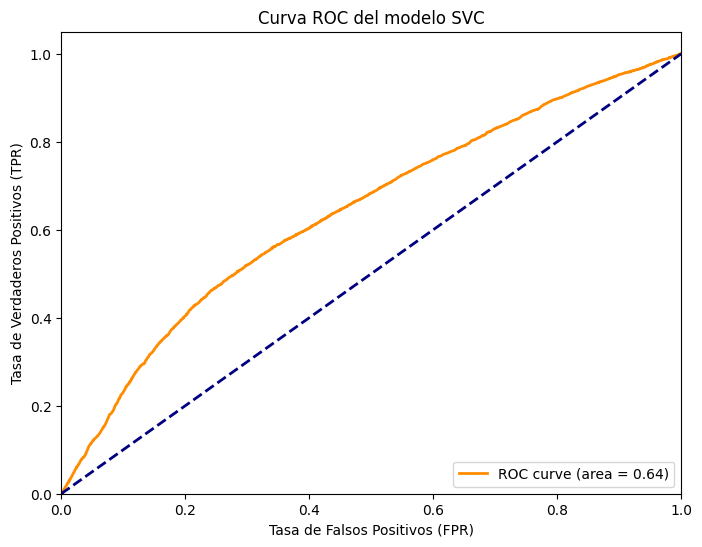

In [ ]:
# Calcular la curva ROC
y_pred_proba_svc = modelo_svc.decision_function(X_test_scaled) # Usar decision_function para obtener scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_svc)

# Calcular el área bajo la curva (AUC)
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del modelo SVC')
plt.legend(loc="lower right")
plt.show()


CURVA PR

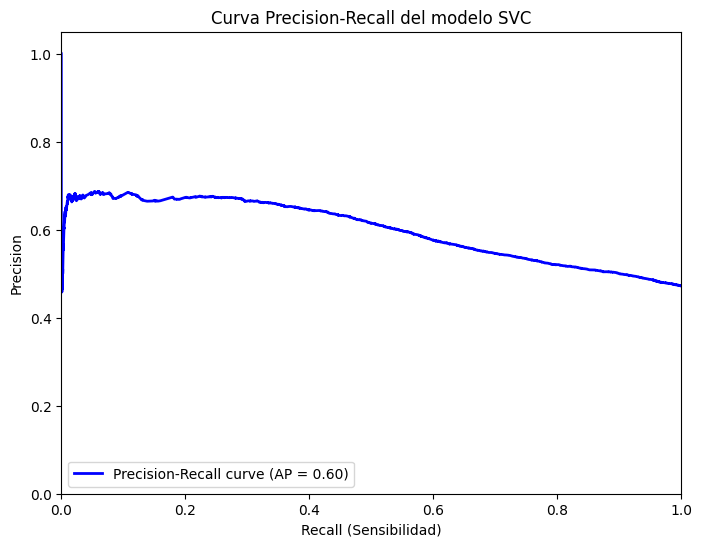

In [ ]:
# prompt: crea un grafico pr con average precision con el modelo svc clasificacion

import matplotlib.pyplot as plt
# Calcular la curva PR
y_pred_proba_svc = modelo_svc.decision_function(X_test_scaled) # Usar decision_function para obtener scores
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_svc)

# Calcular la precisión promedio (Average Precision)
average_precision = average_precision_score(y_test, y_pred_proba_svc)

# Graficar la curva PR
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del modelo SVC')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()


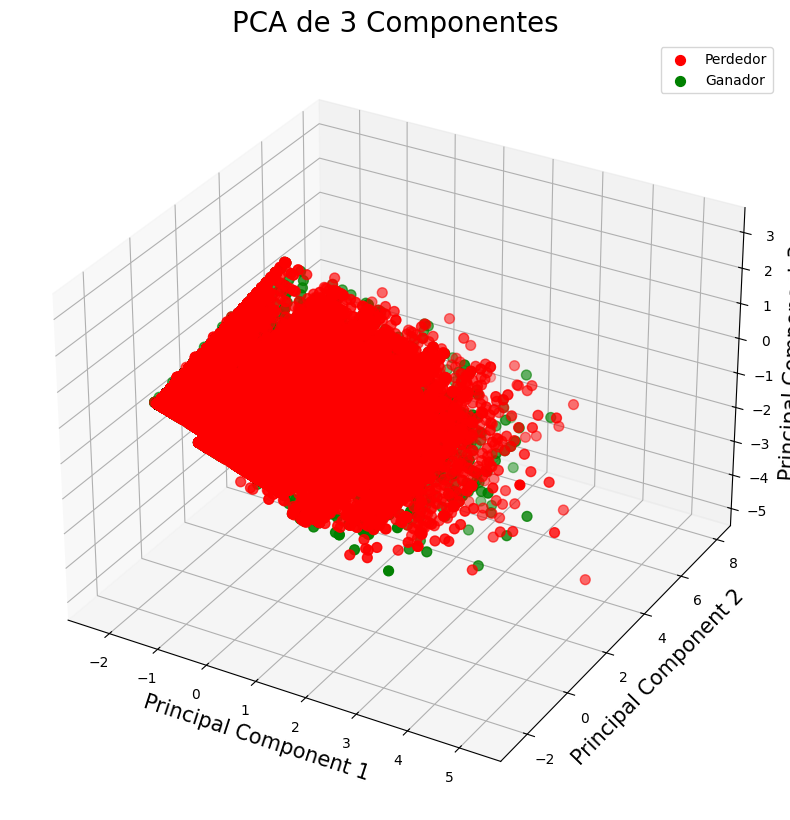

In [ ]:
# prompt: Grafique una representación PCA

# Aplicar PCA a los datos escalados de entrenamiento
pca = PCA(n_components=3) # Reducir a 3 dimensiones
X_train_pca = pca.fit_transform(X_train_scaled)

# Crear un dataframe para graficar con las 3 componentes principales y la etiqueta de MatchWinner
df_pca = pd.DataFrame(data = X_train_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_pca['MatchWinner'] = y_train.reset_index(drop=True) # Agregar la columna 'MatchWinner'

# Graficar en 3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA de 3 Componentes', fontsize = 20)

targets = [0, 1] # 0 para False (Perdedor), 1 para True (Ganador)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['MatchWinner'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2']
               , df_pca.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Perdedor', 'Ganador'])
ax.grid()
plt.show()


# **RandomizedSearchCV**

In [ ]:

param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'class_weight': ['balanced']
}
# Create a smaller subset of the training data for quick tuning
X_grid, _, y_grid, _ = train_test_split(X_train_scaled, y_train, test_size=0.30, random_state=42)


random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist,
    n_iter=10,   # SOLO 10 pruebas totales
    cv=2,
    verbose=3,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_grid, y_grid)

print("✅ Mejores parámetros encontrados:")
print(random_search.best_params_)


best_model = SVC(**random_search.best_params_)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)
cm_r = confusion_matrix(y_test, y_pred)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


✅ Mejores parámetros encontrados:
{'kernel': 'linear', 'class_weight': 'balanced', 'C': 10}


### métricas del mejor modelo encontrado por RandomizedSearchCV

In [ ]:

# Imprimir métricas de evaluación
print("\n--- Métricas de Clasificación del Modelo Final ---")
print(classification_report(y_test, y_pred))

print("--- Matriz de Confusión ---")

print(cm_r)

print("Accuracy:", accuracy_score(y_test, y_pred))



--- Métricas de Clasificación del Modelo Final ---
              precision    recall  f1-score   support

           0       0.63      0.60      0.61     12442
           1       0.58      0.61      0.59     11141

    accuracy                           0.60     23583
   macro avg       0.60      0.60      0.60     23583
weighted avg       0.61      0.60      0.60     23583

--- Matriz de Confusión ---
[[7445 4997]
 [4334 6807]]
Accuracy: 0.6043336301573167


In [ ]:
# prompt: crea calculo de Sensitivity Y Specificity con el mejor modelo de RandomizedSearchCV

# Calcula Sensitivity y Specificity para el mejor modelo encontrado por RandomizedSearchCV
TN, FP, FN, TP = cm_r.ravel()

sensitivity_best = TP / (TP + FN)
specificity_best = TN / (TN + FP)

print(f"\n--- Sensitivity and Specificity for the Best Model from RandomizedSearchCV ---\n")
print(f"Sensitivity: {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")


--- Sensitivity and Specificity for the Best Model from RandomizedSearchCV ---

Sensitivity: 0.6110
Specificity: 0.5984


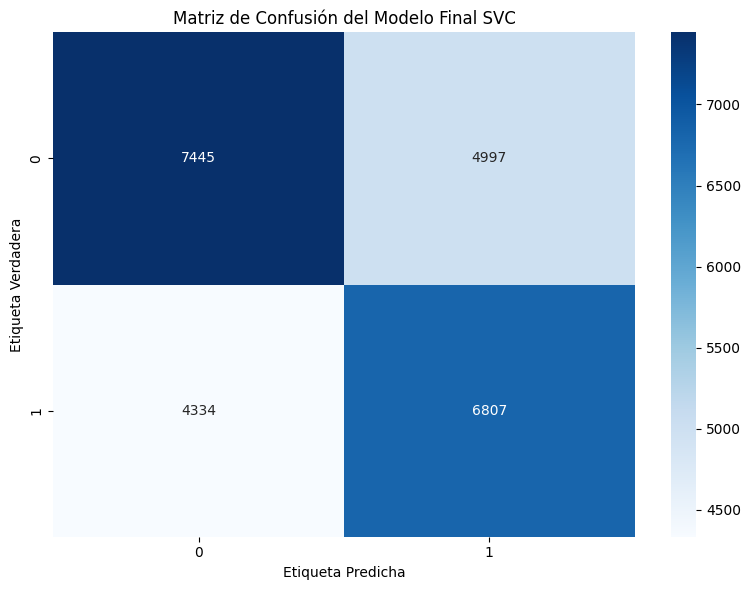

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm_r, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del Modelo Final SVC')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.tight_layout()
plt.show()

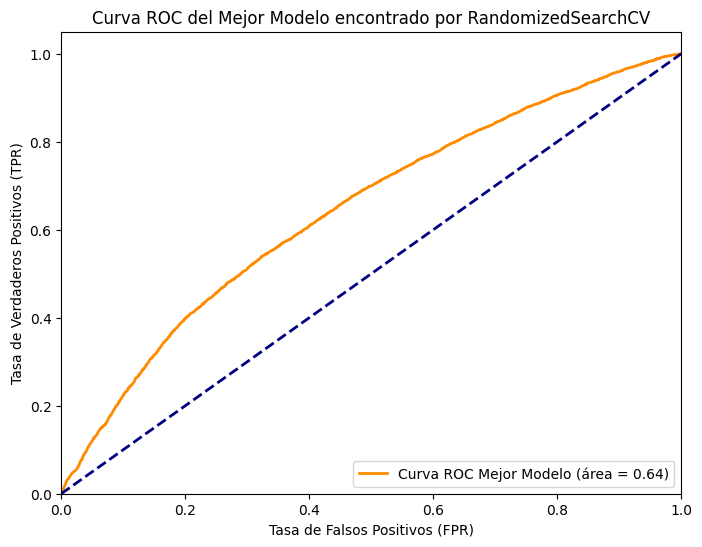

AUC del mejor modelo encontrado por RandomizedSearchCV: 0.6441


In [ ]:
# prompt: dame el curva rog con el mejor modelo que dio RandomizedSearchCV


# Obtener las probabilidades de predicción para la clase positiva (1)
y_pred_proba_best = best_model.decision_function(X_test_scaled)

# Calcular la curva ROC
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)

# Calcular el área bajo la curva (AUC)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best)

# Graficar la curva ROC del mejor modelo
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label=f'Curva ROC Mejor Modelo (área = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Mejor Modelo encontrado por RandomizedSearchCV')
plt.legend(loc="lower right")
plt.show()

print(f"AUC del mejor modelo encontrado por RandomizedSearchCV: {roc_auc_best:.4f}")

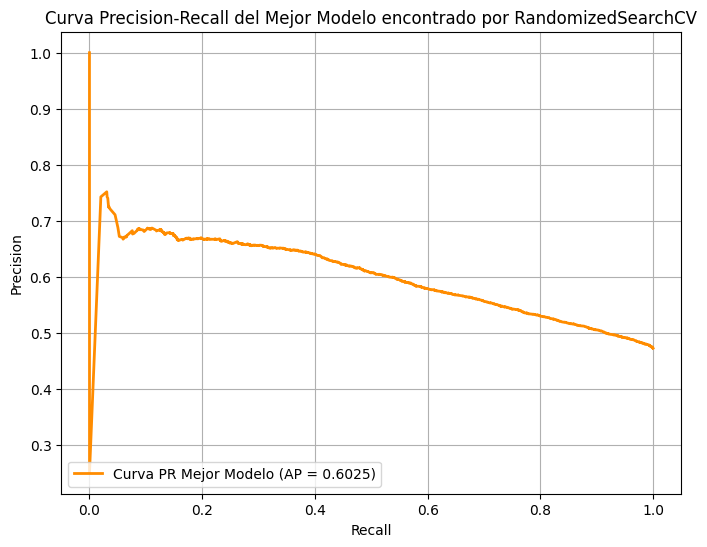

Average Precision del mejor modelo encontrado por RandomizedSearchCV: 0.6025


In [ ]:
# prompt: dame el curva  PR con average presision usando el mejor modelo que dio RandomizedSearchCV



# Obtener las probabilidades de predicción para la clase positiva (1)
y_scores_best = best_model.decision_function(X_test_scaled)

# Calcular la curva PR (Precision-Recall)
precision_best, recall_best, _ = precision_recall_curve(y_test, y_scores_best)

# Calcular el Average Precision (AP)
average_precision_best = average_precision_score(y_test, y_scores_best)

# Graficar la curva PR
plt.figure(figsize=(8, 6))
plt.plot(recall_best, precision_best, color='darkorange', lw=2, label=f'Curva PR Mejor Modelo (AP = {average_precision_best:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del Mejor Modelo encontrado por RandomizedSearchCV')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"Average Precision del mejor modelo encontrado por RandomizedSearchCV: {average_precision_best:.4f}")


### Predicciones con  RandomizedSearchCV

In [ ]:
# prompt: hacer predicion variable x y  Y Con el modelo dado con RandomizedSearchCV




print("\nPredicciones del mejor modelo para el conjunto de prueba (X_test):")
# Para ver las predicciones junto con los datos de prueba correspondientes
# Puedes crear un DataFrame temporal
predictions_df = X_test.copy() # Usa X_test original para ver los valores sin escalar
predictions_df['Actual MatchWinner'] = y_test
predictions_df['Predicted MatchWinner'] = y_pred
print(predictions_df.head()) # Imprime las primeras filas




Predicciones del mejor modelo para el conjunto de prueba (X_test):
       RoundStartingEquipmentValue  MatchKills  RoundHeadshots  \
47581                          300           0               0   
55367                         4450           2               0   
30939                          200          16               0   
4231                          2000           5               0   
58071                         4800           4               0   

       RLethalGrenadesThrown  Actual MatchWinner  Predicted MatchWinner  
47581                      0                   1                      1  
55367                      0                   0                      1  
30939                      0                   0                      1  
4231                       1                   0                      1  
58071                      0                   0                      1  


# **Conclusion**

* El modelo SVC base tuvo un desempeño muy desequilibrado: aunque la precisión global fue cercana al 53%, su recall para la clase 1 fue prácticamente cero (0.0001), lo que indica que casi no detectó ningún caso positivo real. Esto se refleja en la matriz de confusión, donde casi todos los positivos fueron clasificados erróneamente como negativos. En contraste, la especificidad fue muy alta (0.9998), mostrando que el modelo solo predijo la clase 0, ignorando la clase 1, lo que no es útil cuando esta última es importante.

* Luego de utilizar GridSearchCV y ajustar los hiperparámetros, el modelo mejoró significativamente: con un accuracy de 60.4%, y en el  recall de 0.61 para la clase 1, y un F1-score balanceado de aproximadamente 0.60 para ambas clases. La matriz de confusión usa una distribución mucho más equilibrada, detectando el 6807 positivos y reduciendo falsos negativos. En resumen, el modelo ajustado con GridSearchCV es mucho más confiable para poder identicar  ambas clases, especialmente la clase 1, que inicialmente era ignorada por el modelo base de svc.